<a href="https://colab.research.google.com/github/CesarFerrer97/Data-Science-01/blob/main/ProyectoDSParteIFerrer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto:Analisis sobre la perdida de clientes en un banco.

Objetivo: Determinar los factores que inciden en la deserci√≥n de clientes del banco.

Hip√≥tesis:

1) Los clientes que realizan un menor n√∫mero de transacciones mensuales tienen una mayor probabilidad de abandono.

2) Los clientes con un mayor l√≠mite de cr√©dito tienen una mayor probabilidad de quedarse.

3) No hay grandes diferencias en  g√©nero, nivel educativo o estado civil entre aquellos que fueron clientes del banco y aquellos actuales.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/CesarFerrer97/Data-Science-01/refs/heads/main/BankChurners.csv')
print(df.shape )
print(df.columns)

(10127, 23)
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [3]:
# Por recomendaci√≥n de la p√°gina de donde se sac√≥ la base de datos eliminamos las dos √∫ltimas columnas
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
print(df.shape )

(10127, 21)


In [4]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [5]:
print("Datos Nulos:\n\n", df.isna().sum())

Datos Nulos:

 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [6]:
print("Datos Duplicados:\n\n", df.duplicated().sum())

Datos Duplicados:

 0


No hay datos faltantes ni datos duplicados en el dataset.

Hago una exploraci√≥n visual de algunos campos del dataset

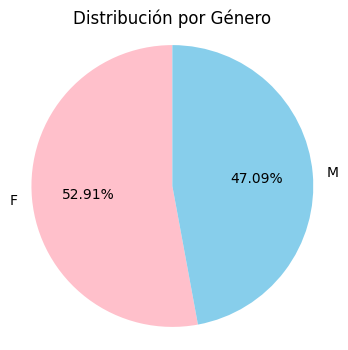

In [7]:
conteos_genero = df['Gender'].value_counts()
colores = ['pink', 'skyblue']
plt.figure(figsize=(4, 4))
plt.pie(conteos_genero, labels=conteos_genero.index, autopct='%1.2f%%', startangle=90, colors=colores)
plt.title('Distribuci√≥n por G√©nero')
plt.axis('equal')
plt.show()

Como cabr√≠a esperar la distribuci√≥n por g√©nero entre clientes es bastante igualitaria.

Text(0, 0.5, 'Nivel educativo')

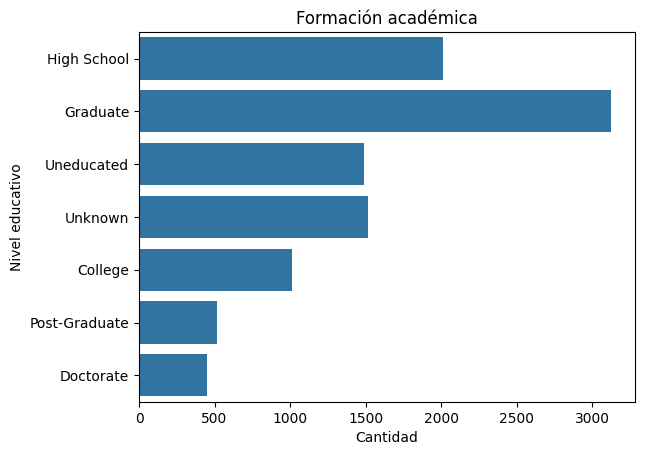

In [8]:
#countplot on 'Education_Level' column
sns.countplot(data=df,y='Education_Level')
plt.title("Formaci√≥n acad√©mica")
plt.xlabel("Cantidad")
plt.ylabel("Nivel educativo")

La mayor√≠a de los clientes del banco tienen estudios de nivel secundario o universitario, mientras que los niveles m√°s avanzados tienen una menor proporci√≥n.

Text(0, 0.5, 'Cantidad')

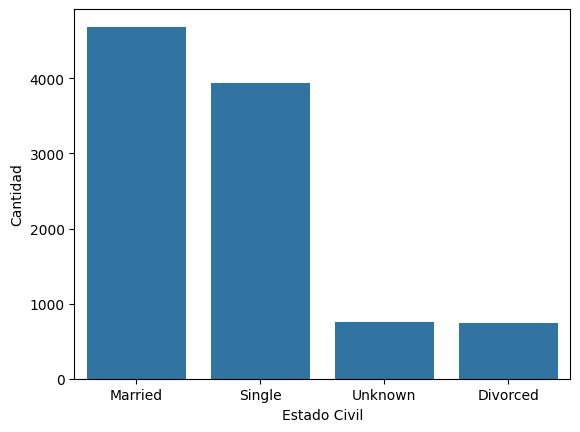

In [9]:
#countplot on 'Marital_Status' column
sns.countplot(data=df,x='Marital_Status')
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad")


La mayor√≠a de los clientes del banco se encuentra casados o soltores.

Text(0, 0.5, 'Cantidad')

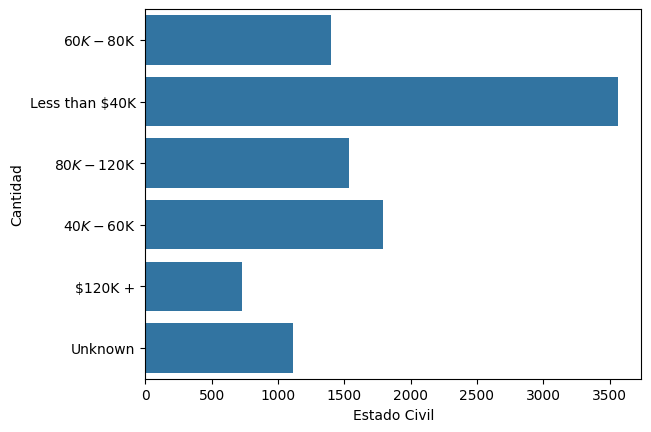

In [10]:
#countplot on 'Income_Category' column
sns.countplot(data=df,y='Income_Category')
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad")

La gran mayor√≠a de los clientes del banco ganan menos de 40k seguido por aquellos que ganan entre 40K y 60K.

Text(0, 0.5, 'Cantidad')

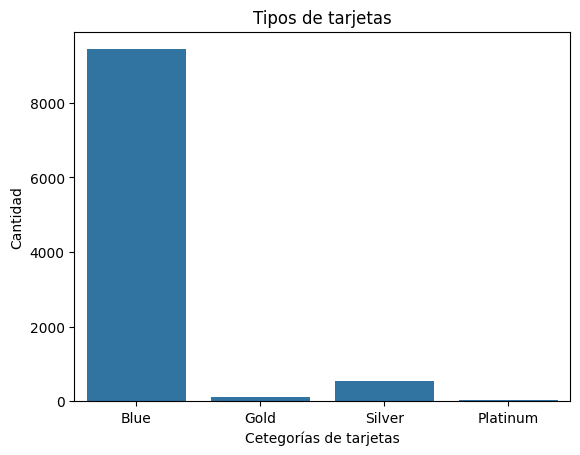

In [11]:
#countplot on 'Card_Category' column
sns.countplot(data=df,x='Card_Category')
plt.title("Tipos de tarjetas")
plt.xlabel("Cetegor√≠as de tarjetas")
plt.ylabel("Cantidad")

En consonancia con el gr√°fico anterior, se observa que la categor√≠a de tarjeta predominante entre los clientes del banco es la 'Blue', la de menor nivel.

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


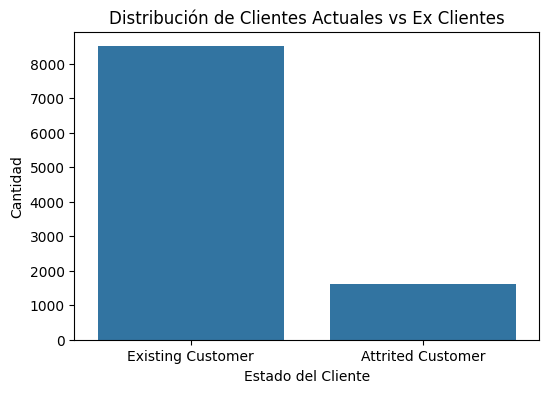

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition_Flag", data=df)
plt.title("Distribuci√≥n de Clientes Actuales vs Ex Clientes")
plt.xlabel("Estado del Cliente")
plt.ylabel("Cantidad")
print(df["Attrition_Flag"].value_counts())

Aproximadamente el 16% de los registros pertenecen a ex clientes del banco.

Hecho ya un pantallazo general de los datos. Nos enfocaremos en ver si hay diferencias significativas entre los clientes actuales y los ex clientes. Para ello, comenzaremos analizando las variables categ√≥ricas respecto a "Attrition_Flag"

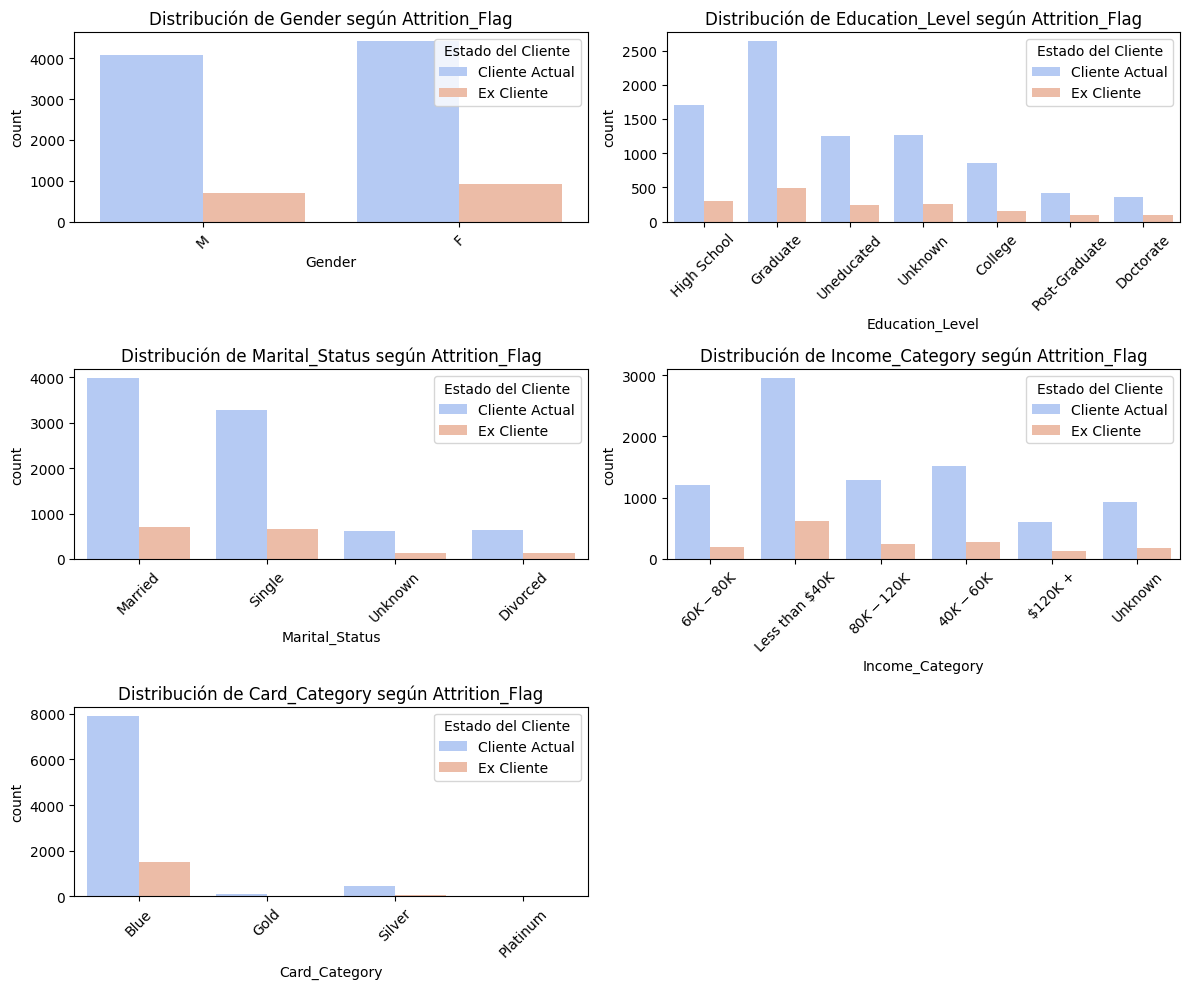

In [ ]:
# Convertir la variable objetivo a num√©rica donde 0 son clientes actuales y 1 los que se fueron
df["Attrition_Flag_Num"] = np.where(df["Attrition_Flag"] == "Attrited Customer", 1, 0)

# Seleccionar variables categ√≥ricas
categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Graficar la distribuci√≥n de cada variable categ√≥rica seg√∫n el estado del cliente
plt.figure(figsize=(12, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var, hue="Attrition_Flag", palette="coolwarm")
    plt.title(f"Distribuci√≥n de {var} seg√∫n Attrition_Flag")
    plt.xticks(rotation=45)
    plt.legend(title="Estado del Cliente", labels=["Cliente Actual", "Ex Cliente"])

plt.tight_layout()
plt.show()


 Al examinar los gr√°ficos no parece haber una relaci√≥n fuerte entre la p√©rdida de clientes y las variables categ√≥ricas presentes en el dataset. Esto sugiere que deber√≠amos explorar las variables num√©ricas. En base a estos hallazgos podriamos confirmar la hip√≥tesis 3.

Attrition_Flag_Num        1.000000
Contacts_Count_12_mon     0.204491
Months_Inactive_12_mon    0.152449
Dependent_count           0.018991
Customer_Age              0.018203
Months_on_book            0.013687
Avg_Open_To_Buy          -0.000285
Credit_Limit             -0.023873
CLIENTNUM                -0.046430
Total_Amt_Chng_Q4_Q1     -0.131063
Name: Attrition_Flag_Num, dtype: float64


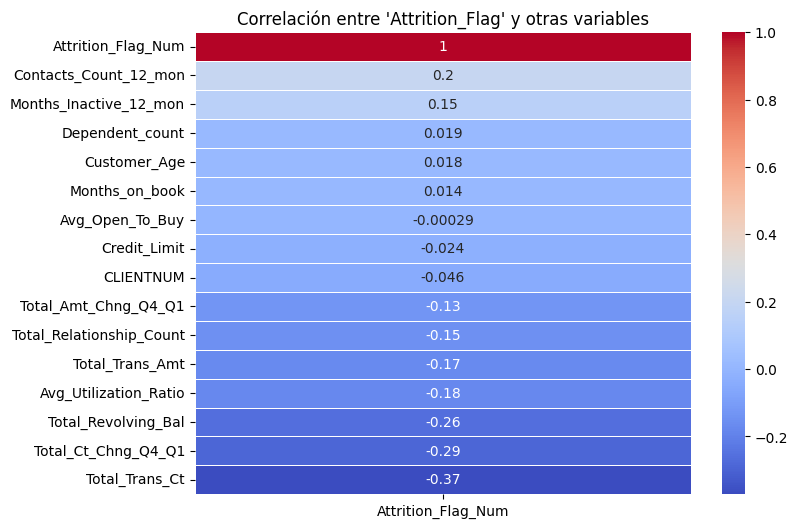

In [ ]:
# Seleccionar solo las columnas num√©ricas para evitar errores
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlaci√≥n
corr_matrix = df_numeric.corr()

# Filtrar solo las correlaciones con la variable de inter√©s
correlations = corr_matrix["Attrition_Flag_Num"].sort_values(ascending=False)

# Mostrar las 10 variables m√°s correlacionadas
print(correlations.head(10))

# Visualizar con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[["Attrition_Flag_Num"]].sort_values(by="Attrition_Flag_Num", ascending=False),
            annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlaci√≥n entre 'Attrition_Flag' y otras variables")
plt.show()



üîπ Conclusiones

üìå Los clientes que usan menos la tarjeta de cr√©dito y tienen menos transacciones son los m√°s propensos a irse, lo que parece confirmar la hip√≥tesis 1.

üìå Un aumento en los contactos con el banco puede ser una se√±al de insatisfacci√≥n antes de abandonar.

üìå Los clientes con m√°s meses de inactividad tambi√©n tienen m√°s chances de dejar el banco.

üìå Variables como el l√≠mite de cr√©dito, la edad y la cantidad de meses como cliente no parecen ser factores determinantes. Esto parece indicar que la hipotesis 2 es que afirma que los clientes con un mayor l√≠mite de cr√©dito tienen una mayor probabilidad de quedarse es falsa.



üîπ Algunas posibles recomendaciones (con lo visto hasta ahora)

‚úÖ Implementar programas de lealtad que ofrezcan recompensas atractivas por el uso frecuente de la tarjeta de cr√©dito y la realizaci√≥n de transacciones.

‚úÖ Capacitar al personal de atenci√≥n al cliente para que pueda resolver los problemas de los clientes de manera eficiente y emp√°tica.

‚úÖ mplementar campa√±as de correo electr√≥nico o mensajes de texto para recordar a los clientes inactivos los beneficios de utilizar los productos y servicios del banco.

‚úÖ Realizar encuestas o entrevistas a clientes inactivos para identificar las razones por las que dejaron de utilizar los productos y servicios del banco.